<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/08_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# NLTK, Spacy, Textacy -> MANIPULATE TEXT -> NLP Pipelines 

# ML -> NUMBERS only 
# Approaches to CONVERT text into NUMBERS or VECTORS or TENSORS 
# y = mx + c where x is an language statement 

# MANIPULATED standards -> CONVINIENCE 

# SPECIAL SYMBOLS INSIDE OUR TEXT so that code could be used to manipulate them 
# WE AS DEVELOPERS OR NLP Engineers manipulate text and add these symbols
# <PAD>   0   -> Neural networks are HARDCODED-> input-size cannot be change once NN is built!
# padding helps chopping/padding different length sentences into same size
# I am good;   Bye.   ->    [I, am, good] ; [Bye, <PAD>, <PAD>]
# y = mx+c ;   y = w1*I + w2*am + w3*good + bias ;   y = w1*bye + w2 * <PAD> + w3 * <PAD>
# y = w1*100 + w2*22 + w3*55 + 102;   y = w1*42 + w2* 0 + w3* 0  
# <START> 1   -> indicates beginning of a sentence or phrase 
# example; if text was Hello World! -> 42 50 
# Processed statement: <START> Hello World! -> 1 42 50
# this way when multiple sentences were present, we could mark beginning of each sentence/phrase

# <PAD> 0          -> 0, any weight multiplied to <PAD> will become 0! 
# <START>  1       -> Indicates beginning of sentence/phrase 
# <UNK>  2         -> your encountered a word outside dictionary 
# <UNUSED> 3       -> SPECIAL symbol that you could give special meaning to 




In [0]:
# IMDB -> has a lot of movie reviews 
# POS, NEG -> our output for a Review 
# Sentiment = weights * review + bias 

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np

1.15.2


In [0]:

# DICTIONARIES are infinite! OXFORD, CAMBRIDGE, QUEEN's, GEORGE's, millions of words!
# constantly increasing!
# WE HAVE TO LIMIT OUR DICTIONARY TO A FINITE SIZE! 
 # assuming our entire english consists of only 10,000 words! 
# REST of the words -> <UNKNOWN>!!!!
imdb = keras.datasets.imdb 
HP_dictionary_size = 10000
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=HP_dictionary_size)



17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(xtrain[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


In [0]:
ytrain[:5]
# there are 2 outputs -> 0 or 1

array([1, 0, 0, 1, 0])

In [0]:
word_index = imdb.get_word_index()   # DICTIONARY HAS TO BE PROVIDED BY DATASET!
# WHOEVER BUILDS DATASET HAS TO BUILD DICTIONARY AS PER THEIR ENCODING 
word_index['bye']
# PRECISELY OPPOSITE of what we need! This can help us with ENCODING, not decoding
# ENCODING is already done! 
# how do we decode? -> REVERSE THE DICTIONARY!!
# Pass it word -> GIVES you a number!
# Our reverse dict -> PASS a number, and get word back 

5455

In [0]:
dictionary = { encoding:word  for word,encoding in word_index.items()   } #dictionary_comprehension

In [0]:
print(dictionary[0]) # EVEN THO-> the sentences begin with 1, because we used top 10,000 words, <START>,<PAD> are missing!!!

KeyError: ignored

In [0]:
# SINCE our special symbols are MISSING, we should add them to the dictionary and then reverse it!!!
# 0-> key was giving us an error! => 0 was missing as key 
# 0 is missing
# i need to add 4 symbols and 0 was missing anyway
# i need to shift only 3 symbols and ADD one 1 symbol (PAD was missing, so add it directly)! 

word_index = {word:(encoding+3) for word,encoding in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2  # unknown words
word_index['<UNUSED>'] = 3
dictionary = { encoding:word  for word,encoding in word_index.items()   } 

print(dictionary[0]) # PAD EXPECTED
print(dictionary[1]) # START expected! 
# NOW OUR ENGLISH DICTIONARY IS READY TO DECODE THOSE MOVIEW REVIEWS 

<PAD>
<START>


In [0]:
# we should pass a review, and get it decoded in english!
def decoder(review):
  decoded_review = [ dictionary.get(word) for word in review]
  sentence = ' '.join(decoded_review)
  return sentence

In [0]:
print(decoder(xtrain[42]))

<START> warning this review contains spoilers do not read if you don't want some points revealed to you before you watch the film br br with a cast like this you wonder whether or not the actors and actresses knew exactly what they were getting into did they see the script and say hey close encounters of the third kind was such a hit that this one can't fail ' unfortunately it does did they even think to check on the director's <UNK> i mean would you do a movie with the director of a movie called <UNK> <UNK> ' <UNK> clark who would later go on to direct the infamous final justice ' made this it makes you wonder how the people of mystery science theater 3000 could hammer final <UNK> and completely miss out on the return ' br br the film is set in a small town in new mexico a little boy and girl are in the street <UNK> one night when a powerful <UNK> <UNK> er a spaceship appears and <UNK> over them in probably the worst special effect sequence of the film the ship <UNK> some kind of red 

In [0]:
sentiment = {1:'POSITIVE', 0:'NEGATIVE'}
for i in range(5):
  print(sentiment.get(ytrain[i]) + ' : ' + decoder(xtrain[i]))

POSITIVE : <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prai

In [0]:
# BEFORE BUILDING Our NN, let's PAD/CHOP these sentences to ensure they are of 
# same length

xtrain_padded = keras.preprocessing.sequence.pad_sequences(xtrain, value=0, padding='post',
                                                           truncating='post', maxlen=256)
xtest_padded = keras.preprocessing.sequence.pad_sequences(xtest, value=0, padding='post', 
                                                          truncating='post', maxlen=256)
print(decoder(xtrain[42]))
print(decoder(xtrain_padded[42])) # LONG SENTENCE CHOPPED
print(decoder(xtrain[62])) # SHORT SENTENCE PADDED
print(decoder(xtrain_padded[62]))

<START> warning this review contains spoilers do not read if you don't want some points revealed to you before you watch the film br br with a cast like this you wonder whether or not the actors and actresses knew exactly what they were getting into did they see the script and say hey close encounters of the third kind was such a hit that this one can't fail ' unfortunately it does did they even think to check on the director's <UNK> i mean would you do a movie with the director of a movie called <UNK> <UNK> ' <UNK> clark who would later go on to direct the infamous final justice ' made this it makes you wonder how the people of mystery science theater 3000 could hammer final <UNK> and completely miss out on the return ' br br the film is set in a small town in new mexico a little boy and girl are in the street <UNK> one night when a powerful <UNK> <UNK> er a spaceship appears and <UNK> over them in probably the worst special effect sequence of the film the ship <UNK> some kind of red 

In [0]:
HP_dictionary_size = 10000
HP_dim_from_embed = 16 
# each word broken into 16 vectors! total= 10,000 X 16 weights for vectors
HP_dim_l3_l4 = 64
HP_dim_l3_l3extra = 128
HP_epoch = 50
HP_maxlen = 256
HP_batch_size = 128   # batch size is HOW many elements to read in 1 go! 
# SPEEDS up the learning by reading multiple inputs at a time! 


In [0]:
# this didn't work because layers got copied in SHALLOW not deep
# as a result, in the list, they were still attached to each other
# while creating network 3, it actually got associated with prev networks because of layer
# names!!

layer1 = keras.layers.Embedding(HP_dictionary_size, HP_dim_from_embed)
layer2 = keras.layers.GlobalAveragePooling1D()
layer3 = keras.layers.Dense(HP_dim_l3_l4, activation=tf.nn.relu)
layer3_alternate = keras.layers.Dense(HP_dim_l3_l4)
layer3_extra = keras.layers.Dense(HP_dim_l3_l3extra, activation=tf.nn.relu)
layer4 = keras.layers.Dense(1, activation = tf.nn.sigmoid)

model_layers1 = [layer1, layer2, layer3, layer4]
model_layers2 = [layer1, layer2, layer3_alternate, layer4]
model_layers3 = [layer1, layer2, layer3, layer3_extra, layer4]

m1 = keras.Sequential(model_layers1)
m2 = keras.Sequential(model_layers2)
m3 = keras.Sequential(model_layers3)



ValueError: ignored

In [0]:

layer1 = keras.layers.Embedding(HP_dictionary_size, HP_dim_from_embed)
layer2 = keras.layers.GlobalAveragePooling1D()
layer3 = keras.layers.Dense(HP_dim_l3_l4, activation=tf.nn.relu)
layer4 = keras.layers.Dense(1, activation = tf.nn.sigmoid)

model_layers1 = [layer1, layer2, layer3, layer4]
m1 = keras.Sequential(model_layers1)


In [0]:

layer1_b = keras.layers.Embedding(HP_dictionary_size, HP_dim_from_embed)
layer2_b = keras.layers.GlobalAveragePooling1D()
layer3_b = keras.layers.Dense(HP_dim_l3_l4)
layer4_b = keras.layers.Dense(1, activation = tf.nn.sigmoid)

model_layers2 = [layer1_b, layer2_b, layer3_b, layer4_b]
m2 = keras.Sequential(model_layers2)


In [0]:
layer1_c = keras.layers.Embedding(HP_dictionary_size, HP_dim_from_embed)
layer2_c = keras.layers.GlobalAveragePooling1D()
layer3_c = keras.layers.Dense(HP_dim_l3_l4, activation=tf.nn.relu)
layer4_c = keras.layers.Dense(128, activation=tf.nn.relu)
layer5_c = keras.layers.Dense(1, activation = tf.nn.sigmoid)

model_layers3 = [layer1_c, layer2_c, layer3_c, layer4_c, layer5_c]
m3 = keras.Sequential(model_layers3)

In [0]:
m1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

m1.summary()
# 10,000 words X 16 vectors = 160,000 weights 
# To calc average -> SUM/N -> No weights required! 0 params
# 16 X 64 + 64 = 1088
# 64 X 1 + 1 = 65

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [0]:
m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
m2.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [0]:

m3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
m3.summary()
# dense layers:
# parameters = input_dim(Weights from previous layers!!!) X weights + bias 
# 16X64 + 64 = 1088
# 64X128 + 128 = 8320
# 128X1 + 1 = 129

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 169,537
Trainable params: 169,537
Non-trainable params: 0
_________________________________________________________________


In [0]:
# last time, we had taken Validation_split to get some validation data!
# today, let's extract our validation data 
print(len(xtrain))

print(len(xtest))


25000
25000


In [0]:
# validation data -> divided testing into (25,000) -> val (10,000) + test (15,000)
# 2X1 = 3
# 2X2 =4
# left 2, right 2
# At end of every epoch-> test with validation data -> train again -> validate again-> keep repeating



xval = xtest_padded[:10000]
xtest_padded_reduced = xtest_padded[10000:]
yval = ytest[:10000]
ytest_reduced = ytest[10000:]


In [0]:
# xtrain_padded, xtest_padded_reduced
import time

start_time = time.time()
history_m1 = m1.fit(xtrain_padded, ytrain, epochs=HP_epoch, batch_size=HP_batch_size, 
                    validation_data = (xval, yval), verbose=1) 
end_time = time.time()
print('Time Taken = ' + str(end_time-start_time))
# OBSERVE-> BATCH_Size is being read per set (previous 1 input 1 time)

Train on 25000 samples, validate on 10000 samples
Epoch 1/50
25000/25000 [==============================] - 2s 72us/sample - loss: 0.0667 - acc: 0.9832 - val_loss: 0.5637 - val_acc: 0.8410
Epoch 2/50
25000/25000 [==============================] - 2s 69us/sample - loss: 0.0599 - acc: 0.9851 - val_loss: 0.6038 - val_acc: 0.8425
Epoch 3/50
25000/25000 [==============================] - 2s 70us/sample - loss: 0.0549 - acc: 0.9869 - val_loss: 0.6293 - val_acc: 0.8401
Epoch 4/50
25000/25000 [==============================] - 2s 68us/sample - loss: 0.0478 - acc: 0.9894 - val_loss: 0.6681 - val_acc: 0.8376
Epoch 5/50
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0432 - acc: 0.9916 - val_loss: 0.7013 - val_acc: 0.8332
Epoch 6/50
25000/25000 [==============================] - 2s 67us/sample - loss: 0.0387 - acc: 0.9926 - val_loss: 0.7429 - val_acc: 0.8362
Epoch 7/50
25000/25000 [==============================] - 2s 72us/sample - loss: 0.0345 - acc: 0.9936 - val_loss: 0.

In [0]:
start_time = time.time()
history_m1 = m1.fit(xtrain_padded, ytrain, epochs=HP_epoch, batch_size=HP_batch_size, 
                    validation_data = (xval, yval), verbose=0) 
end_time = time.time()
print('Time Taken = ' + str(end_time-start_time))
# now real time will be printed 
# time = base_time + extra_relu 
# 3 runners. A = 10 seconds, B=12, C=15 seconds. A =10 is base. B = base+2, C=base+5

Time Taken = 83.37666153907776


In [0]:
start_time = time.time()
history_m2 = m2.fit(xtrain_padded, ytrain, epochs=HP_epoch, batch_size=HP_batch_size, 
                    validation_data = (xval, yval), verbose=0)
end_time = time.time()
print('Time Taken = ' + str(end_time-start_time))
# NO RELU operation which was extra time
# time = base_time

# breaktime-> 5:10 


Time Taken = 81.55203485488892


In [0]:

start_time = time.time()
history_m3 = m3.fit(xtrain_padded, ytrain, epochs=HP_epoch, batch_size=HP_batch_size, 
                    validation_data = (xval, yval), verbose=0)
end_time = time.time()
print('Time Taken = ' + str(end_time-start_time))
# base_time + relu + dense 

Time Taken = 85.04317235946655


In [0]:
import matplotlib.pyplot as plt

stats = history_m1.history
val_acc = stats['val_acc']
accuracy = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1,HP_epoch+1) # for printing! indexing otherwise is 0!

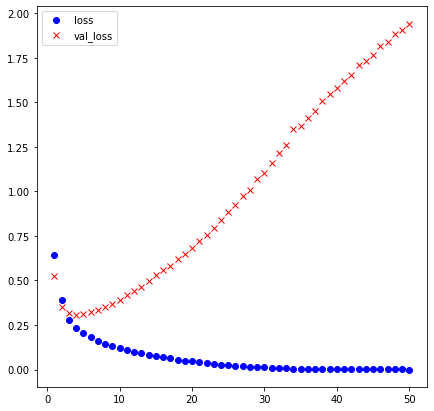

In [0]:
# FIRST MODEL's ACCv/s Val_acc
plt.figure(figsize=(7,7))
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'rx', label='val_loss')
plt.legend()
plt.show()

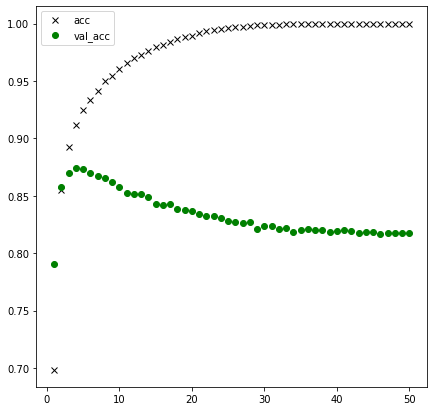

In [0]:
plt.figure(figsize=(7,7))
plt.plot(epochs,accuracy , 'kx', label='acc')
plt.plot(epochs, val_acc, 'go', label='val_acc')
plt.legend()
plt.show()

# BECAUSE validation metrics are falling, and model metrics are getting better, 
# we can conclude this is OVERFITTING!!!! 

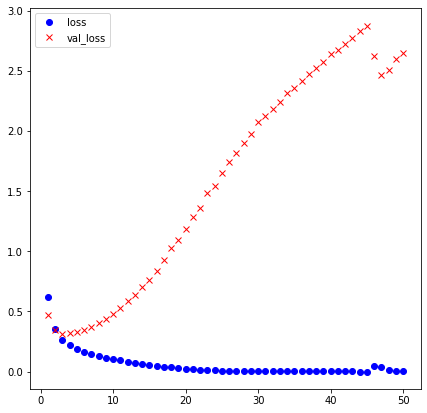

In [77]:
stats = history_m2.history
val_acc = stats['val_acc']
accuracy = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1,HP_epoch+1)
plt.figure(figsize=(7,7))
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'rx', label='val_loss')
plt.legend()
plt.show()

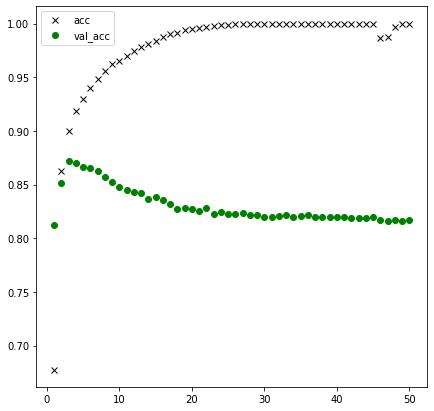

In [78]:
plt.figure(figsize=(7,7))
plt.plot(epochs,accuracy , 'kx', label='acc')
plt.plot(epochs, val_acc, 'go', label='val_acc')
plt.legend()
plt.show()

In [0]:


# it depends on context usually 
# where you get sentiments on that review may be it comes afetr 100 words?
# 
# REASON why we are having a limit of 256
# if even after 256 words somebody is not able to give me a review, then what use was it?
# it was pure blabbering then!
#
# what about sarcastic reviews?
# ALL DEPENDS on your training data! 0,1,2 -> NEG, POS, SARCASM 
# and need enough training data and labels to have NN learn this 

# How to build formulae
# https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematical_induction.htm
# Ralph L Grimaldi's Discrete and Combinatorial math 

In [76]:
xtrain[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [84]:
sentiment_threshold = 0.5  # everything above 0.5 is POS, else neg

results1 = m1.predict(xtest_padded_reduced) # SCORING the model1
results2 = m2.predict(xtest_padded_reduced) 
results3 = m3.predict(xtest_padded_reduced)

results1_classified = [ 1 if result>=sentiment_threshold else 0  for result in results1]
results2_classified = [ 1 if result>=sentiment_threshold else 0  for result in results2]
results3_classified = [ 1 if result>=sentiment_threshold else 0  for result in results3]

# EVALUATE the model
from sklearn.metrics import accuracy_score # EVALUATION of model
acc1 = accuracy_score(results1_classified, ytest_reduced)
acc2 = accuracy_score(results2_classified, ytest_reduced)
acc3 = accuracy_score(results3_classified, ytest_reduced)
print('Model 1 = ' + str(acc1))
print('Model 2 = ' + str(acc2))
print('Model 3 = ' + str(acc3))


# Mani - 70 % confidence and 30% error -> Shantanu is male
# Keshav - 99% confidence and 20% error -> Shantanu is male


Model 1 = 0.8209333333333333
Model 2 = 0.8214666666666667
Model 3 = 0.8184


In [83]:

print(ytest_reduced[:5])
print(results1[:5])

[1 1 0 1 0]
[[9.959967e-01]
 [1.000000e+00]
 [0.000000e+00]
 [5.437434e-04]
 [4.351139e-05]]


i have a doubt.  scoring the model - isn't same as validating. if not wen are we doing scoring the model. 

SCORING means testing  -> when we prediction results, comparing them with actual results (ytest-> variable) -> THIS IS AFTER MODEL is trained

SCORING -> getting the test results and evaluating 
(SOme consider it 1 step, some consider it 2 steps)

1 step-> get the results and compare
2 step-> get the result (SCORING) and compare (EVALUATION) 


VALIDATION is testing at every EPOCH end -> DURING model training 



